In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import src
from testingUtils import testing_main as tm
import matplotlib.pyplot as plt
import numpy as np


import src
from src.nc4.BJDSprialScan import processExpSprialScans, spiralPlotter
# import matplotlib as mp
# mpl.use('TkAgg')
%matplotlib inline

%load_ext autoreload
%autoreload 2

In [2]:
HOME_DIR, BASE_DIR, CODE_DIR, TB_DIR, RMS_DATA_DIR = src.config.config_paths()

# Testing Main Notebook

`testing_main.py` contains multiple functions:
- `main()`: choose an exp to load in, update and save it.
- `update(exp)`: update exp with new data, and display nc4.
- `check_ae(exp)`: plot last file of AE data in test.
- `check_nc4(exp)`: calc last NC4 file attributes and plot results.

----------------------TESTING EXP FILE----------------------
Test No: 19
Date: 2024-08-05
Data: ..\..\AE\Testing\24_08_05_weartest_D1.3_#1000
No. Files: AE-140 NC4-141
------------------------------------------------------------
------------------------------------------------------------
NC4 - File 140:
	Mean radius = 0.610812 mm
	Runout = 0.163 um
	Wear = -8.557 %
------------------------------------------------------------


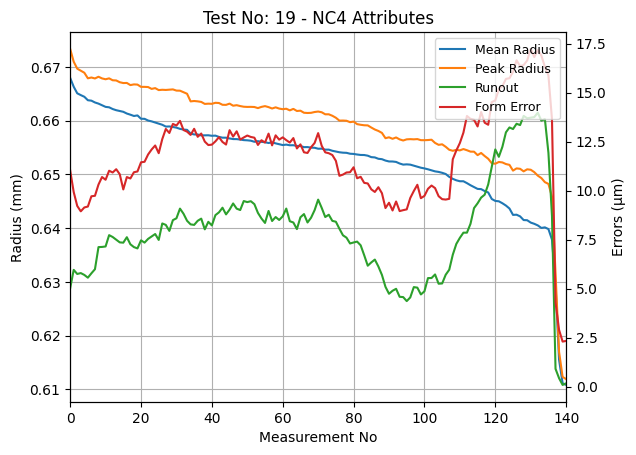

In [3]:
exp = tm.main()

In [29]:
exp.save()

------------------------------------------------------------
Updating experiemnt obj - 2024-08-06 09:51:26.774298
No. Files: AE-146 NC4-147
------------------------------------------------------------
NC4 - File 146:
	Mean radius = 0.653974 mm
	Runout = 0.313 um
	Wear = -2.095 %
------------------------------------------------------------


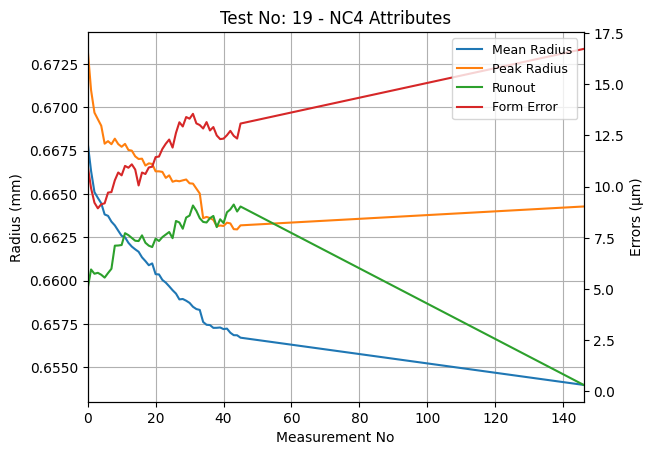

In [5]:
f = tm.update(exp)

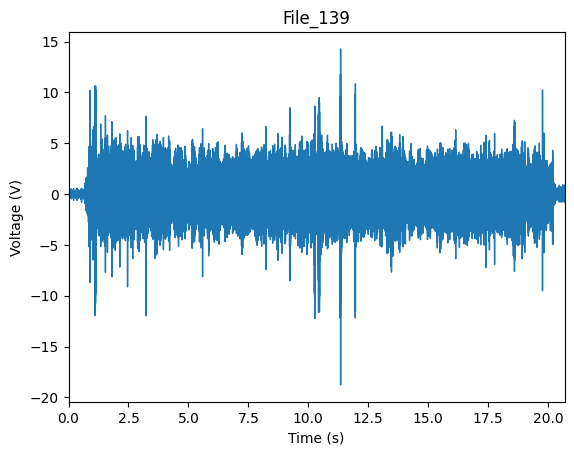

In [30]:
tm.check_ae(exp)

In [31]:
exp.nc4.process()

NC4- Calc att: 100%|██████████| 141/141 [00:11<00:00, 12.07it/s]


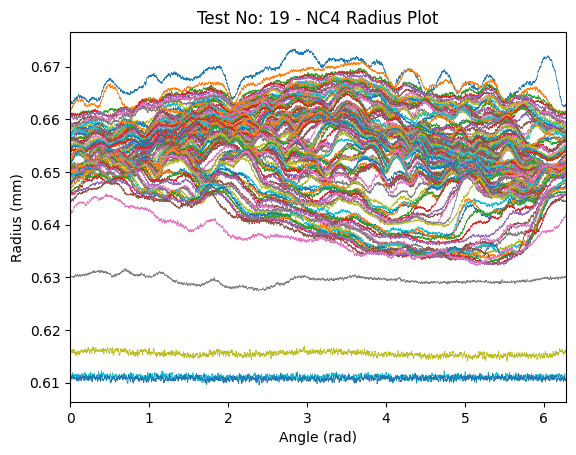

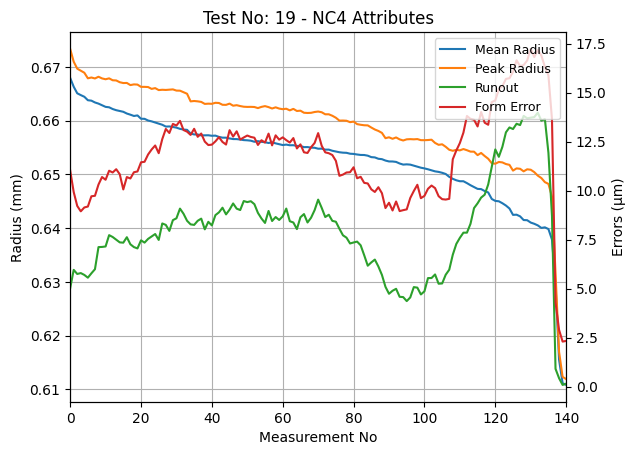

In [25]:
fno = (0, None)
f = exp.nc4.plot_xy(fno)
f = exp.nc4.plot_att(fno)

(<Figure size 640x480 with 2 Axes>,
 <AxesSubplot: title={'center': 'Test No: 19 - NC4 Radius Surface'}, xlabel='Angle (rad)', ylabel='Measurement Number'>)

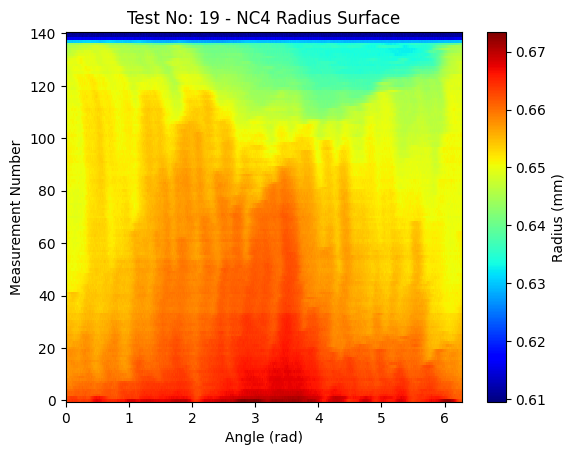

In [26]:
exp.nc4.plot_surf(fno)

In [27]:
exp.save()

In [32]:
# NC4 Spiral Scans
NOM_DIA = 1.3
FEEDRATE = 2
RPM = 60
FS = 50_000
YOFFSET = 0.03
CALFEEDRATE = 60

SCPath = CODE_DIR.joinpath(
    r'src/reference/NC4_BJD_SCurve_2024_05_30_14_17_12-Ch0-50kHz.tdms'
)
assert SCPath.exists(), "SCurve calibration file not found."

expSpiralScans = processExpSprialScans(exp,
                                       SCPath,
                                       NOM_DIA,
                                       FEEDRATE,
                                       RPM,
                                       FS,
                                       YOFFSET,
                                       CALFEEDRATE,
                                       )

for sc in expSpiralScans:
    fig, ax = sc.plotSpiralScan(saveFig=True)
    plt.close(fig)

Processing Spiral Scans: 100%|██████████| 30/30 [00:59<00:00,  1.99s/it]


In [ ]:
# %matplotlib widget
scPlotter = spiralPlotter(expSpiralScans, exp.test_info.testno).plot()

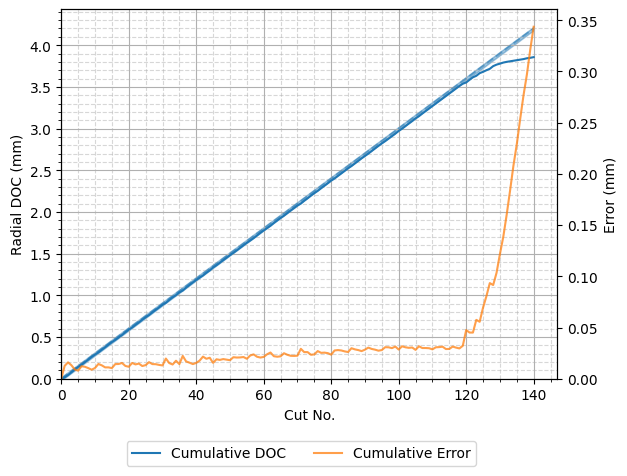

In [33]:
exp.probe
exp.probe.refreshProbeData()
if exp.probe is not None:
    fig, ax = exp.probe.plot_probe_DOC()
    ax.minorticks_on()
    ax.grid(True, which='major')
    ax.grid(True, which='minor', linestyle='--', alpha=0.5)


### Extra Processing - Wait till CUSP

In [4]:
exp.ae.process()

Calc FFT 1 kHz: 100%|██████████| 140/140 [01:01<00:00,  2.28it/s]


In [5]:
exp.save()

In [6]:
exp.create_feat_df();

Feature DF of Test 19:
        RMS   Kurtosis  Amplitude  Skewness  Freq 10 kHz  Freq 35 kHz  \
0       NaN        NaN        NaN       NaN          NaN          NaN   
1  0.651781  12.179272  11.303619 -0.041852    41.820082    63.129210   
2  0.956851   6.530323  10.327271  0.014557    41.958946    66.114873   
3  1.154066   5.707869  11.797177 -0.058372    42.187934    70.106153   
4  1.334270   5.323803  13.332642 -0.094015    42.915322    71.844572   

   Freq 134 kHz  Mean radius  Peak radius  Radius diff    Runout  Form error  \
0           NaN     0.667968     0.673366          NaN  0.005013    0.011034   
1     46.407589     0.666329     0.670993    -0.001639  0.005954    0.009927   
2     49.807488     0.665104     0.669690    -0.001225  0.005746    0.009216   
3     50.948798     0.664768     0.669309    -0.000336  0.005790    0.008942   
4     51.976171     0.664459     0.668933    -0.000309  0.005696    0.009139   

   Avg probe  Probe diff  
0     0.0000      0.0000  
1  

In [11]:
exp.save()

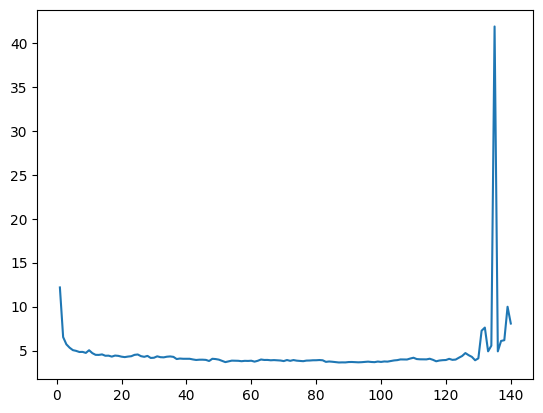

In [8]:
plt.figure()
plt.plot(exp.features['Kurtosis'])

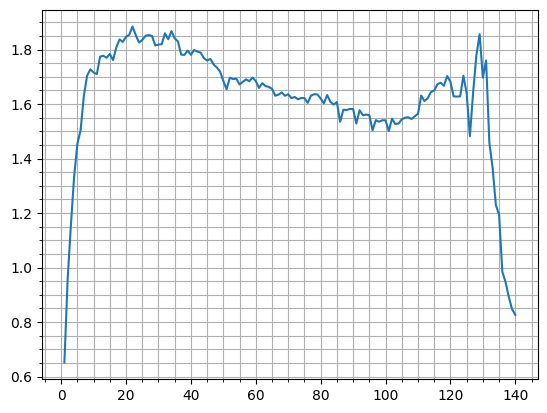

In [9]:
plt.figure()
plt.plot(exp.features['RMS'])
plt.minorticks_on()
plt.grid(True, which='both')

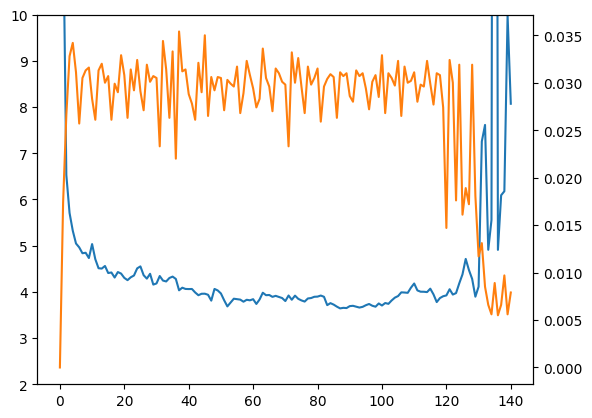

In [10]:
plt.figure()
plt.plot(exp.features['Kurtosis'])
plt.ylim(2, 10)
plt.twinx()
plt.plot(exp.features['Probe diff'], 'C1')

In [ ]:
# nc4_df = exp.features.loc[:, ['Mean radius', 'Peak radius', 'Runout', 'Form error']]
# nc4_df.head()
# nc4_df.to_csv(fr'{exp.dataloc}\NC4Data.csv')